<a href="https://colab.research.google.com/github/everluiz/Machine-learning-class/blob/main/DeepL03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

criando vetores

In [ ]:
x0, x1, x2 = 1., 2., 3.
bias, w1, w2 = 0.1, 0.3, 0.5

x = [x0,x1,x2]
w = [bias,w1,w2]

vetorização com loop for

In [ ]:
z = 0.
for i in range(len(x)):
  z += x[i] * w[i]

print(z)

2.2


usando os vetores em lista

In [ ]:
z = sum(x_i*w_i for x_i, w_i in zip(x,w))
print(z)

2.2


implementação de forma vetorizada

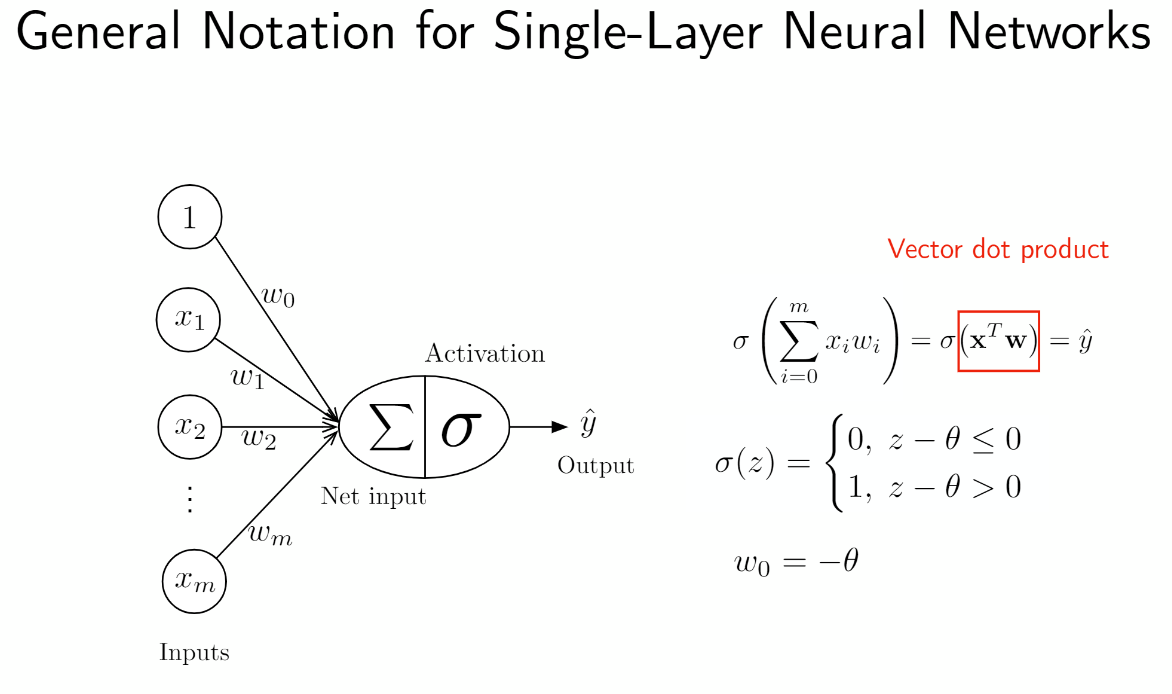

In [ ]:
import numpy as np
x_vec, w_vec = np.array(x), np.array(w)
z = (x_vec.transpose()).dot(w_vec)
print(z)

z = x_vec.dot(w_vec)
print(z)

2.2
2.2


esses três metodos possuem tempo de processamento diferentes, sendo o ultimo o mais rapido.

**Metodo de aprendizado Perceptron**
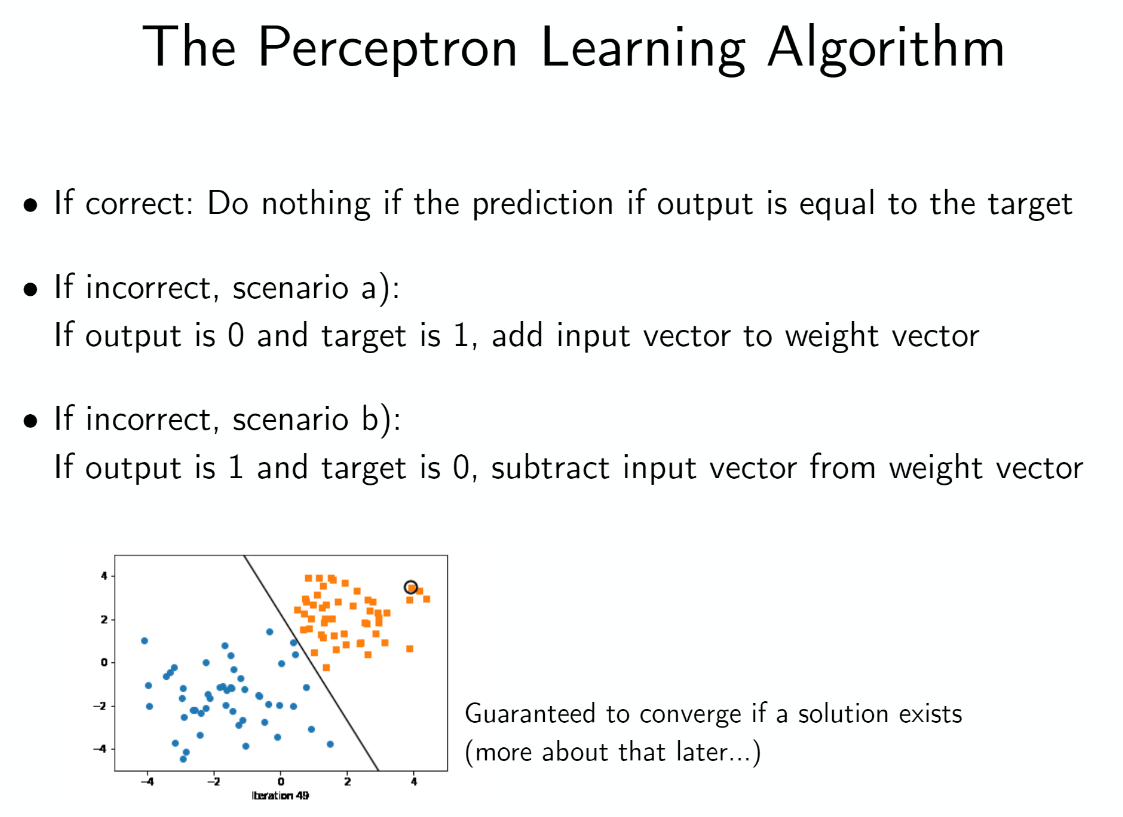

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


preparando o dataset

In [ ]:
# DATASET
data = np.genfromtxt("/content/drive/My Drive/perceptron_toydata.txt", delimiter='\t')
x, y = data[:, :2], data[:,2]
y = y.astype(np.int)

print('Class label counts:', np.bincount(y))
print('x.shape', x.shape)
print('y.shape', y.shape)

#shuffling & train/test split
shuffle_idx = np.arange(y.shape[0]) # cria array com range 0 a y.shape[0] que é 100. ou seja, array de 0 - 99
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
x, y = x[shuffle_idx], y[shuffle_idx]

x_train, x_test = x[shuffle_idx[:70]],x[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]],y[shuffle_idx[70:]]

#normalize ( mean zero, unit variance)

mu, sigma = x_train.mean(axis=0), x_train.std(axis=0)
x_train = (x_train -mu)/sigma
x_test = (x_test -mu)/sigma

Class label counts: [50 50]
x.shape (100, 2)
y.shape (100,)


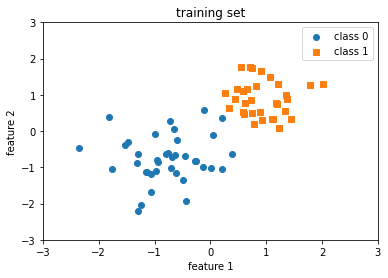

In [ ]:
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1], label='class 0', marker='o')
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1], label='class 1', marker='s')
plt.title('training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend()
plt.show()

In [ ]:
class perceptron():
  def __init__(self,num_features):
    self.num_features = num_features
    self.weights = np.zeros((num_features,1), dtype=np.float)
    self.bias = np.zeros(1, dtype=np.float)

  def forward(self,x):
    linear = np.dot(x, self.weights) + self.bias
    predictions = np.where(linear > 0., 1, 0) # aonde linear >0, predictions = 1, else, predictions = 0
    return predictions
  
  def backward(self,x,y):
    predictions = self.forward(x)
    errors = y - predictions
    return errors
  
  def train(self, x, y, ephochs):
    for e in range(ephochs):
      for i in range(y.shape[0]):
        errors = self.backward(x[i].reshape(1,self.num_features), y[i]).reshape(-1) #reshape's para transformar vetor linha em coluna..
        self.weights += (errors*x[i]).reshape(self.num_features,1)
        self.bias += errors
  
  def evaluate(self,x,y):
    predictions = self.forward(x).reshape(-1)
    accuracy = np.sum(predictions == y) / y.shape[0]
    return accuracy


In [ ]:
ppn = perceptron(num_features=2)

ppn.train(x_train, y_train, ephochs =5)

print('model parameters:\n\n')
print(' weights: %s\n' % ppn.weights)
print(' bias: %s\n' % ppn.bias)

model parameters:


 weights: [[1.27340847]
 [1.34642288]]

 bias: [-1.]



In [ ]:
weights = np.zeros((2,1), dtype=np.float)
bias = np.zeros(1, dtype=np.float)
linear = np.dot(x_train, weights) + bias
predictions = np.where(linear > 0., 1, 0)
#print(linear)

In [ ]:
#print(x_train)
#print(x_train.shape)
#print(y_train.shape[0])

In [ ]:
test_acc = ppn.evaluate(x_test, y_test)
print('test set accuracy: %.2f%%' %(test_acc*100))

test set accuracy: 93.33%


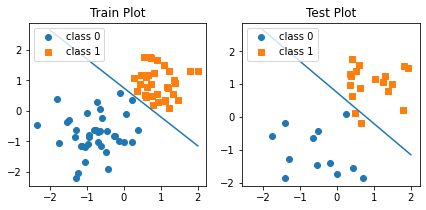

In [ ]:
## 2d decision boundary


w, b = ppn.weights, ppn.bias

x_min = -2
y_min = ( (-(w[0]*x_min) - b[0]) / w[1] )

x_max = 2
y_max = ( (-(w[0]*x_max) - b[0]) / w[1] )

fig, ax = plt.subplots(1,2, sharex=True, figsize=(7,3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(x_train[y_train==0,0],x_train[y_train==0,1], label='class 0', marker='o')
ax[0].scatter(x_train[y_train==1,0],x_train[y_train==1,1], label='class 1', marker='s')
ax[0].title.set_text('Train Plot')

ax[1].scatter(x_test[y_test==0,0],x_test[y_test==0,1], label='class 0', marker='o')
ax[1].scatter(x_test[y_test==1,0],x_test[y_test==1,1], label='class 1', marker='s')
ax[1].title.set_text('Test Plot')

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
plt.show()

In [ ]:
import torch

In [ ]:
X = torch.arange(50, dtype=torch.float).view(10,5)
# .view() e .reshape() são equivalentes
X

tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29.],
        [30., 31., 32., 33., 34.],
        [35., 36., 37., 38., 39.],
        [40., 41., 42., 43., 44.],
        [45., 46., 47., 48., 49.]])

In [ ]:
fc_layer = torch.nn.Linear(in_features=5,out_features=3) # cria rede neural de cinco entradas e 3 neuronios (ativação linear)

In [ ]:
fc_layer.weight # ele cria pesos aleatorios, matriz W

Parameter containing:
tensor([[-0.2578,  0.2773, -0.3996, -0.4051, -0.3432],
        [ 0.1201,  0.1884,  0.0697, -0.3314,  0.1147],
        [-0.4314,  0.0438,  0.3513, -0.0169,  0.2104]], requires_grad=True)

In [ ]:
fc_layer.bias # vetor de bias ou W_0

Parameter containing:
tensor([-0.1061,  0.2017,  0.2178], requires_grad=True)

In [ ]:
print('X dim:', X.size())
print('W dim:', fc_layer.weight.size())
print('b dim:', fc_layer.bias.size())

A = fc_layer(X) # Fully connected layer
print('A:', A)  # três informações de saida para as 10 linhas de entrada
print('A dim:', A.size())

X dim: torch.Size([10, 5])
W dim: torch.Size([3, 5])
b dim: torch.Size([3])
A: tensor([[-3.2159e+00, -5.6834e-03,  1.7551e+00],
        [-8.8578e+00,  8.0221e-01,  2.5411e+00],
        [-1.4500e+01,  1.6101e+00,  3.3272e+00],
        [-2.0141e+01,  2.4180e+00,  4.1133e+00],
        [-2.5783e+01,  3.2259e+00,  4.8994e+00],
        [-3.1425e+01,  4.0338e+00,  5.6854e+00],
        [-3.7067e+01,  4.8417e+00,  6.4715e+00],
        [-4.2709e+01,  5.6496e+00,  7.2576e+00],
        [-4.8350e+01,  6.4575e+00,  8.0437e+00],
        [-5.3992e+01,  7.2654e+00,  8.8297e+00]], grad_fn=<AddmmBackward>)
A dim: torch.Size([10, 3])


**Regressão Linear**



*   Simples implementação de uma rede neural
*   Conceitos como função objetivo (target function) e função de custo (cost function)
*   Otimização pelo gradiente descendente ( gradient descent)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(seed=1) #define uma semente do gerador numérico aleatório para o exemplo

In [ ]:
x = np.random.uniform(0,1,20) # vetor x de input, com 20 valores de distribuição uniforme entre 0 e 1

def f(x): return x*2 #função que representa a linha sem noise

noise_variance = 0.2 # variancia do gaussian noise
noise = np.random.randn(x.shape[0]) * noise_variance #cria o noise

t = f(x) + noise # cria a função alvo

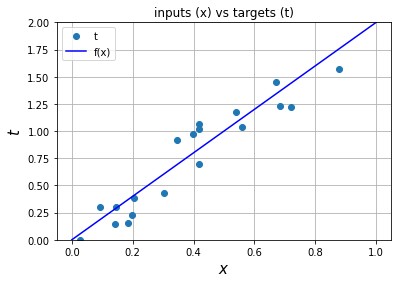

In [ ]:
plt.plot(x, t, 'o', label='t')
plt.plot([0,1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$t$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (t)')
plt.grid()
plt.legend(loc=2)
plt.show()

**Definindo a função de custo**


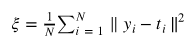

In [ ]:
def nn(x, w): #define a função de rede neural
    y = x * w
    return y

def activation(y):
    z = y
    return z

def cost(y, t):
    xi = (0.5*(y - t)**2).sum()
    return xi


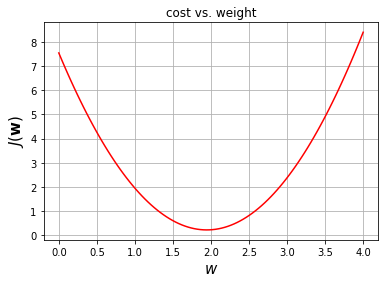

In [ ]:
ws = np.linspace(0, 4, num=100) # pesos w
cost_ws = np.vectorize(lambda w: cost(activation(nn(x, w)) , t))(ws)  # custo de cada peso em w

plt.plot(ws, cost_ws, 'r-')
plt.xlabel('$w$', fontsize=15)
plt.ylabel('$J(\mathbf{w})$', fontsize=15)
plt.title('cost vs. weight')
plt.grid()
plt.show()

**Otimizando a função de custo**

**Gradiente descendente**


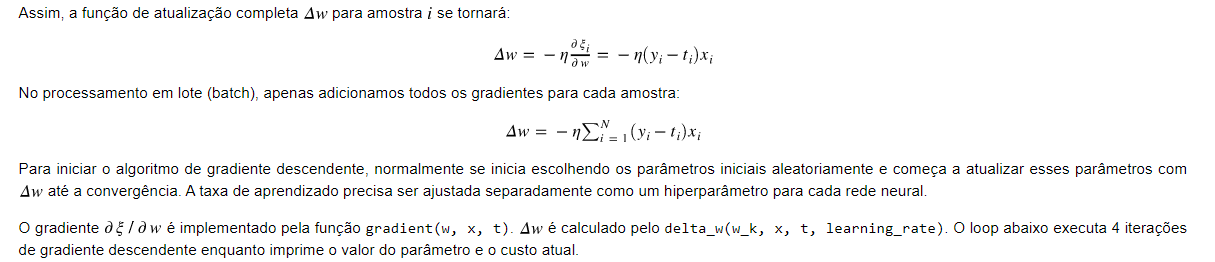

In [ ]:
def gradient(w, x, t): # define a função gradiente
  return x * (activation(nn(x, w)) - t)

def delta_w(w_k, x, t, learning_rate): # função update do delta w. Metodo Batch
  return learning_rate * gradient(w_k, x, t).sum()

#setando parametros de peso inicial
w = 0.1
# setando a taxa de aprendizado
learning_rate = 0.1

# iniciando o gradiente descendente
nb_of_iterations = 4
w_cost = [(w, cost(nn(x, w), t))] #lista que armazena os pesos e custos

for i in range(nb_of_iterations):
  dw = delta_w(w, x, t, learning_rate) # pega valor de update do delta w
  w = w - dw # faz update dos pesos
  w_cost.append((w,cost(activation(nn(x,w)),t))) # adiciona peso,custo a lista

#print de w e custo finais
for i in range(0,len(w_cost)):
  print('w({}): {:.4f} \t cost: {:.4f}'.format(i,w_cost[i][0], w_cost[i][1]))

w(0): 0.1000 	 cost: 6.8099
w(1): 0.8139 	 cost: 2.6999
w(2): 1.2515 	 cost: 1.1554
w(3): 1.5197 	 cost: 0.5749
w(4): 1.6842 	 cost: 0.3568


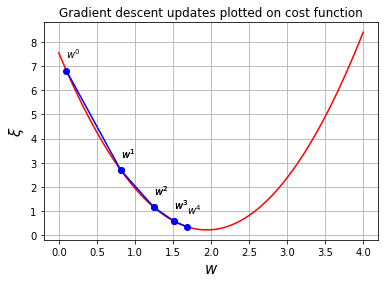

In [ ]:
# Plot the first 2 gradient descent updates
plt.plot(ws, cost_ws, 'r-')  # Plot the error curve
# Plot the updates
for i in range(0, len(w_cost)-1):
    w1, c1 = w_cost[i]
    w2, c2 = w_cost[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.5, '$w^{}$'.format(i)) 
    plt.plot(w2, c2, 'bo') # Plot the final point
    plt.text(w2, c2+0.5, '$w^{}$'.format(i+1)) # Text the final point
# Show figure
plt.xlabel('$w$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('Gradient descent updates plotted on cost function')
plt.grid()
plt.show()